""" In this dataset, we will look at the recipe of muffin and
cupcake. We will use the Support Vector Machine (SVM) to detect 
what we would be making; either a cupcake or muffin"""

In [2]:
# First, we are going to load our packages for this coding
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import svm

In [3]:
# Let us not forget to load our visualization for the data
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# Then we can load the data, but be careful not to load the path I am using since you will have to change it because you have a different computer than mine
cupmuf = pd.read_excel('C:/Users/Delmafia91/Downloads/RecipesMuffinsCupcakes.xlsx')

In [5]:
# Now that we have everything we need, we can take a peek at the data
cupmuf.head(5)

,Type,Flour,Milk,Sugar,Butter,Egg,Baking Powder,Vanilla,Salt
0,Muffin,55,28,3,7,5,2,0,0
1,Muffin,47,24,12,6,9,1,0,0
2,Muffin,47,23,18,6,4,1,0,0
3,Muffin,45,11,17,17,8,1,0,0
4,Muffin,50,25,12,6,5,2,1,0


In [6]:
# Notice that these are numeric. I am sure we could guess what those numbers mean. I think the "Flour" means ounces, "Milk" liters and etc... These are the ingredients needed for the recipe

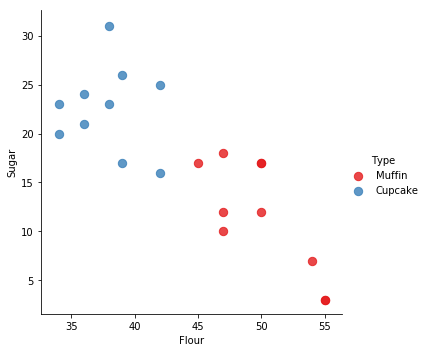

In [7]:
# We also need to plot the data so we can see how these variables look like.
sns.lmplot('Flour', 'Sugar', data = cupmuf, hue='Type',
          palette='Set1', fit_reg=False, scatter_kws={"s": 70});
# We can see here that just based on sugar and flour alone there is a definite split and we use these models to actually look at the graphs and if we drew a line between the blue and red dots, we would be able to do an SVM and a hyperplane

In [12]:
# Now we need to format or pre-process our data. Remember we need decide if it is a muffin or cupcake because the computer does not know anything but zeros and ones
# Basically we are creating a type for cupcake and muffin. It is 0, it is a muffin; otherwise cupcake
type_label = np.where(cupmuf['Type']=='Muffin', 0, 1)
cupmuf_feat = cupmuf.columns.values[1:].tolist()
cupmuf_feat

['Flour', 'Milk', 'Sugar', 'Butter', 'Egg', 'Baking Powder', 'Vanilla', 'Salt']

In [13]:
# We can take the recipe and just do flour and sugar to really see what is going on. Doing all the ingredients would result into 7 or 8 types of different hyperplanes which would not be wise, but we can look at one to see what SVM is doing
cpmfingr = cupmuf[['Flour', 'Sugar']].values
print(cpmfingr)

[[55  3]
 [47 12]
 [47 18]
 [45 17]
 [50 12]
 [55  3]
 [54  7]
 [47 10]
 [50 17]
 [50 17]
 [39 26]
 [42 16]
 [34 20]
 [39 17]
 [38 23]
 [42 25]
 [36 21]
 [38 31]
 [36 24]
 [34 23]]


In [14]:
# Let us just look at all the recipe feature this time
cpmfingrs = cupmuf[cupmuf_feat].values
print(cpmfingrs)
# We can now that we do not have any labels; just the values

[[55 28  3  7  5  2  0  0]
 [47 24 12  6  9  1  0  0]
 [47 23 18  6  4  1  0  0]
 [45 11 17 17  8  1  0  0]
 [50 25 12  6  5  2  1  0]
 [55 27  3  7  5  2  1  0]
 [54 27  7  5  5  2  0  0]
 [47 26 10 10  4  1  0  0]
 [50 17 17  8  6  1  0  0]
 [50 17 17 11  4  1  0  0]
 [39  0 26 19 14  1  1  0]
 [42 21 16 10  8  3  0  0]
 [34 17 20 20  5  2  1  0]
 [39 13 17 19 10  1  1  0]
 [38 15 23 15  8  0  1  0]
 [42 18 25  9  5  1  0  0]
 [36 14 21 14 11  2  1  0]
 [38 15 31  8  6  1  1  0]
 [36 16 24 12  9  1  1  0]
 [34 17 23 11 13  0  1  0]]


In [15]:
# looking for specific ingredients
ingredients = cupmuf[['Flour', 'Sugar']].values
ingredients

array([[55,  3],
       [47, 12],
       [47, 18],
       [45, 17],
       [50, 12],
       [55,  3],
       [54,  7],
       [47, 10],
       [50, 17],
       [50, 17],
       [39, 26],
       [42, 16],
       [34, 20],
       [39, 17],
       [38, 23],
       [42, 25],
       [36, 21],
       [38, 31],
       [36, 24],
       [34, 23]], dtype=int64)

In [16]:
# We now are going to the next step and in this one, we want to fit our model
cupmufel = svm.SVC(kernel='linear')
cupmufel.fit(ingredients, type_label)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [18]:
# Get the separating hyperplane
cm = cupmufel.coef_[0]
a = -cm[0] / cm[1]
xx = np.linspace(30, 60)
yy = a * xx - (cupmufel.intercept_[0]) / cm[1]
print(yy)

# plot the parallels to the separating hyperplane
cc = cupmufel.support_vectors_[0]
yy_down = a * xx + (cc[1] - a * cc[0])
mm = cupmufel.support_vectors_[-1]
yy_up = a * xx + (mm[1] - a * mm[0])

[ 1.15779472e+16  1.10528750e+16  1.05278028e+16  1.00027306e+16
  9.47765844e+15  8.95258624e+15  8.42751405e+15  7.90244185e+15
  7.37736965e+15  6.85229746e+15  6.32722526e+15  5.80215306e+15
  5.27708087e+15  4.75200867e+15  4.22693647e+15  3.70186428e+15
  3.17679208e+15  2.65171988e+15  2.12664769e+15  1.60157549e+15
  1.07650329e+15  5.51431096e+14  2.63588995e+13 -4.98713297e+14
 -1.02378549e+15 -1.54885769e+15 -2.07392989e+15 -2.59900208e+15
 -3.12407428e+15 -3.64914648e+15 -4.17421867e+15 -4.69929087e+15
 -5.22436307e+15 -5.74943526e+15 -6.27450746e+15 -6.79957966e+15
 -7.32465185e+15 -7.84972405e+15 -8.37479625e+15 -8.89986844e+15
 -9.42494064e+15 -9.95001284e+15 -1.04750850e+16 -1.10001572e+16
 -1.15252294e+16 -1.20503016e+16 -1.25753738e+16 -1.31004460e+16
 -1.36255182e+16 -1.41505904e+16]


In [19]:
# Get the separating hyperplane
cm = cupmufel.coef_[0]
a = -cm[0] / cm[1]
xx = np.linspace(30, 60)
yy = a * xx - (cupmufel.intercept_[0]) / cm[1]

# plot the parallels to the separating hyperplane
cc = cupmufel.support_vectors_[0]
yy_down = a * xx + (cc[1] - a * cc[0])
mm = cupmufel.support_vectors_[-1]
yy_up = a * xx + (mm[1] - a * mm[0])
print(yy_down)

[ 1.28642688e+16  1.23391966e+16  1.18141244e+16  1.12890522e+16
  1.07639800e+16  1.02389078e+16  9.71383564e+15  9.18876344e+15
  8.66369124e+15  8.13861905e+15  7.61354685e+15  7.08847465e+15
  6.56340246e+15  6.03833026e+15  5.51325806e+15  4.98818587e+15
  4.46311367e+15  3.93804147e+15  3.41296928e+15  2.88789708e+15
  2.36282488e+15  1.83775269e+15  1.31268049e+15  7.87608295e+14
  2.62536098e+14 -2.62536098e+14 -7.87608295e+14 -1.31268049e+15
 -1.83775269e+15 -2.36282488e+15 -2.88789708e+15 -3.41296928e+15
 -3.93804147e+15 -4.46311367e+15 -4.98818587e+15 -5.51325806e+15
 -6.03833026e+15 -6.56340246e+15 -7.08847465e+15 -7.61354685e+15
 -8.13861905e+15 -8.66369124e+15 -9.18876344e+15 -9.71383564e+15
 -1.02389078e+16 -1.07639800e+16 -1.12890522e+16 -1.18141244e+16
 -1.23391966e+16 -1.28642688e+16]


In [ ]:
# Get the separating hyperplane
cm = cupmufel.coef_[0]
a = -cm[0] / cm[1]
xx = np.linspace(30, 60)
yy = a * xx - (cupmufel.intercept_[0]) / cm[1]
print(yy)

# plot the parallels to the separating hyperplane
cc = cupmufel.support_vectors_[0]
yy_down = a * xx + (cc[1] - a * cc[0])
mm = cupmufel.support_vectors_[-1]
yy_up = a * xx + (mm[1] - a * mm[0])

In [20]:
# Get the separating hyperplane
cm = cupmufel.coef_[0]
a = -cm[0] / cm[1]
xx = np.linspace(30, 60)
yy = a * xx - (cupmufel.intercept_[0]) / cm[1]

# plot the parallels to the separating hyperplane
cc = cupmufel.support_vectors_[0]
yy_down = a * xx + (cc[1] - a * cc[0])
mm = cupmufel.support_vectors_[-1]
yy_up = a * xx + (mm[1] - a * mm[0])
print(yy_up)

[ 1.02914151e+16  9.76634286e+15  9.24127066e+15  8.71619846e+15
  8.19112627e+15  7.66605407e+15  7.14098187e+15  6.61590968e+15
  6.09083748e+15  5.56576528e+15  5.04069309e+15  4.51562089e+15
  3.99054869e+15  3.46547650e+15  2.94040430e+15  2.41533210e+15
  1.89025991e+15  1.36518771e+15  8.40115515e+14  3.15043318e+14
 -2.10028879e+14 -7.35101075e+14 -1.26017327e+15 -1.78524547e+15
 -2.31031767e+15 -2.83538986e+15 -3.36046206e+15 -3.88553426e+15
 -4.41060645e+15 -4.93567865e+15 -5.46075085e+15 -5.98582304e+15
 -6.51089524e+15 -7.03596743e+15 -7.56103963e+15 -8.08611183e+15
 -8.61118402e+15 -9.13625622e+15 -9.66132842e+15 -1.01864006e+16
 -1.07114728e+16 -1.12365450e+16 -1.17616172e+16 -1.22866894e+16
 -1.28117616e+16 -1.33368338e+16 -1.38619060e+16 -1.43869782e+16
 -1.49120504e+16 -1.54371226e+16]


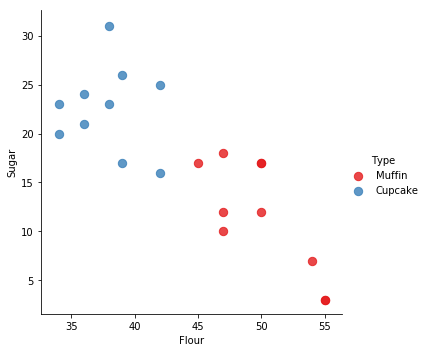

In [21]:
# We are now goint to review the first LMplot we looked at and then plot new graphs
sns.lmplot('Flour', 'Sugar', data = cupmuf, hue='Type',
          palette='Set1', fit_reg=False, scatter_kws={"s": 70})

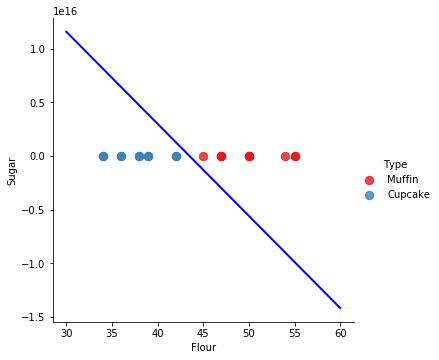

In [22]:
# Since seaborn sits on top of pyplot, we can do the pyplot for the line to go through 
sns.lmplot('Flour', 'Sugar', data = cupmuf, hue='Type',
          palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='blue')
# And we can see just doing flour and sugar on the corresponding line between sugar and flour and the muffin vs cupcake

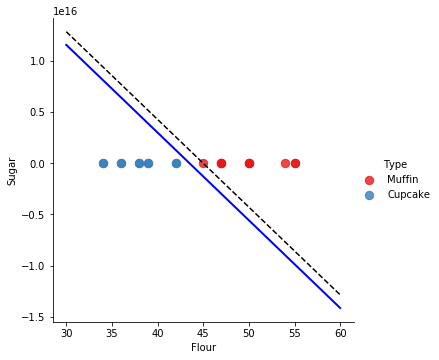

In [28]:
# We did create a yy_down. Let us take a look and see what it looks like 
sns.lmplot('Flour', 'Sugar', data = cupmuf, hue='Type',
          palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='blue')
plt.plot(xx, yy_down, 'k--')

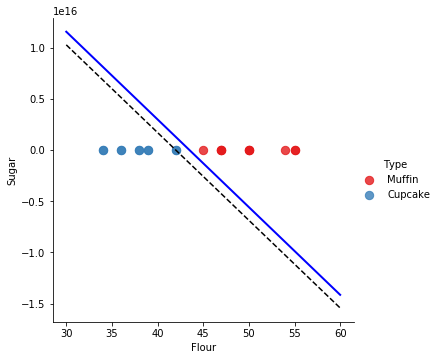

In [30]:
# Let us take a look and see what it looks like when we add yy_up 
sns.lmplot('Flour', 'Sugar', data = cupmuf, hue='Type',
          palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='blue')
plt.plot(xx, yy_up, 'k--')

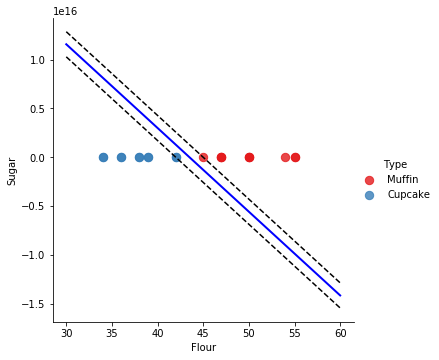

In [29]:
# Let us take a look and see what it looks like when we add yy_up 
sns.lmplot('Flour', 'Sugar', data = cupmuf, hue='Type',
          palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='blue')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')
# So we expected these two lines to go through the nearest data points and dash lines go through the nearest mifin and the nearest cupcake, and the SVM to go right through the midst of the two dash lines

In [28]:
# This is where we will want to create a function to predict muffin or cupcake. The reason for it is that you do not want to keep on writing the same thing all the time. That would be tiring
def Cupcake_or_Muffin(flour, sugar):
    if(cupmufel.predict([[flour, sugar]]))==0:
        print('You\'re looking at a muffin recipe')
    else:
        print('You\'re looking at a cupcake recipe')

In [29]:
# predict if 50 parts flour and 20 parts sugar
Cupcake_or_Muffin(50, 20)

You're looking at a muffin recipe


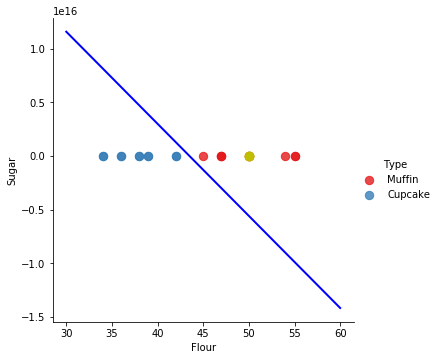

In [32]:
# plot prediction on the graph
sns.lmplot('Flour', 'Sugar', data = cupmuf, hue='Type',
          palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='blue')
plt.plot(50, 20, 'yo', markersize='9')